# Checking transferability and Generalizeability of Air Quality Index Prediction 

## 1. Data Processing

* Importing required Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.impute import KNNImputer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from functools import partial
rmse = partial(mean_squared_error, squared=False)
from sklearn.metrics import mean_absolute_error, mean_squared_error, balanced_accuracy_score,accuracy_score

* Loading Test and Train data

In [72]:
train_data=pd.read_csv("city_day.csv")
train_data.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
23536,Mumbai,2019-08-09,18.48,66.95,19.78,8.54,28.11,10.95,0.43,9.26,11.43,1.38,NaN,NaN,74.0,Satisfactory
4477,Bengaluru,2015-07-03,17.28,NaN,1.07,5.11,2.70,5.96,7.52,3.69,8.37,NaN,1.35,NaN,185.0,Moderate
15006,Hyderabad,2016-03-04,63.29,99.76,5.44,12.41,16.46,10.27,1.08,5.80,44.08,1.02,5.70,2.22,117.0,Moderate
1896,Ahmedabad,2020-03-11,31.12,80.79,3.56,21.51,13.13,NaN,3.56,19.43,16.68,2.85,46.56,1.13,152.0,Moderate
15393,Hyderabad,2017-03-26,62.45,152.69,9.35,38.24,10.57,19.94,0.17,12.70,65.94,0.09,1.29,0.25,140.0,Moderate
28089,Visakhapatnam,2016-07-21,2.00,57.56,3.77,13.46,9.35,13.88,0.70,11.33,49.86,2.74,6.61,2.04,NaN,NaN
21260,Lucknow,2018-11-15,159.24,NaN,30.07,50.62,50.00,45.88,2.16,8.04,32.19,0.19,1.09,NaN,342.0,Very Poor
29157,Visakhapatnam,2019-06-24,35.47,71.35,5.17,28.75,19.50,5.85,0.68,8.96,24.19,4.23,13.81,1.78,75.0,Satisfactory
19502,Kolkata,2019-07-24,14.63,33.81,6.44,18.29,24.72,8.27,0.38,6.15,20.87,12.91,10.46,2.52,44.0,Good
14590,Hyderabad,2015-01-13,NaN,NaN,33.63,23.37,57.00,NaN,0.72,3.01,13.66,2.05,17.65,1.88,NaN,NaN


In [73]:
test_data= test_data=pd.read_csv("Beijing_AQI.csv")
test_data.sample(10)

,month,AQI,scope,quality level,PM2.5,PM10,SO2,NO2,CO,O3
48,2017-12,81,23~254,good,44,68,8,49,1.090,25
7,2014-07,140,39~252,light pollution,89,100,6,39,0.939,170
23,2015-11,153,37~450,Moderately polluted,119,85,12,62,1.983,25
53,2018-05,91,0~169,good,45,85,4,36,0.648,134
20,2015-08,104,37~202,light pollution,45,66,3,31,0.790,159
72,2019-12,73,28~233,good,44,60,4,46,0.845,37
85,2021-01,72,30~176,good,33,55,4,31,0.690,49
18,2015-06,111,35~231,light pollution,60,70,6,35,1.303,156
104,2022-08,67,26~120,good,19,34,3,15,0.465,115
54,2018-06,111,44~190,light pollution,43,67,4,32,0.700,168


In [74]:
train_data.shape

(29531, 16)

In [75]:
test_data.shape

(118, 10)

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          118 non-null    object 
 1   AQI            118 non-null    int64  
 2   scope          118 non-null    object 
 3   quality level  118 non-null    object 
 4   PM2.5          118 non-null    int64  
 5   PM10           118 non-null    int64  
 6   SO2            118 non-null    int64  
 7   NO2            118 non-null    int64  
 8   CO             118 non-null    float64
 9   O3             118 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 9.3+ KB


In [78]:
train_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [79]:
test_data.describe()

,AQI,PM2.5,PM10,SO2,NO2,CO,O3
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,95.830508,52.372881,77.847458,7.720339,37.932203,0.856458,96.677966
std,27.560440,27.600569,31.619973,9.151979,14.924728,0.460377,47.398633
min,47.000000,16.000000,32.000000,2.000000,14.000000,0.329000,25.000000
25%,74.250000,33.250000,57.250000,3.000000,26.250000,0.567000,49.500000
50%,91.000000,45.000000,71.500000,4.000000,35.500000,0.745000,94.500000
75%,114.250000,62.000000,94.000000,7.750000,48.000000,0.921250,137.250000
max,187.000000,152.000000,172.000000,56.000000,80.000000,2.865000,184.000000


* Data Visualization and Data Expolration

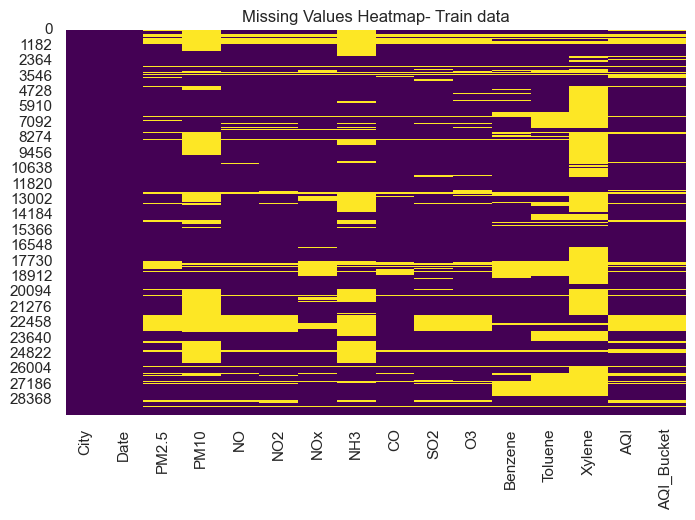

In [80]:
plt.figure(figsize=(8, 5))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap- Train data')
plt.show()

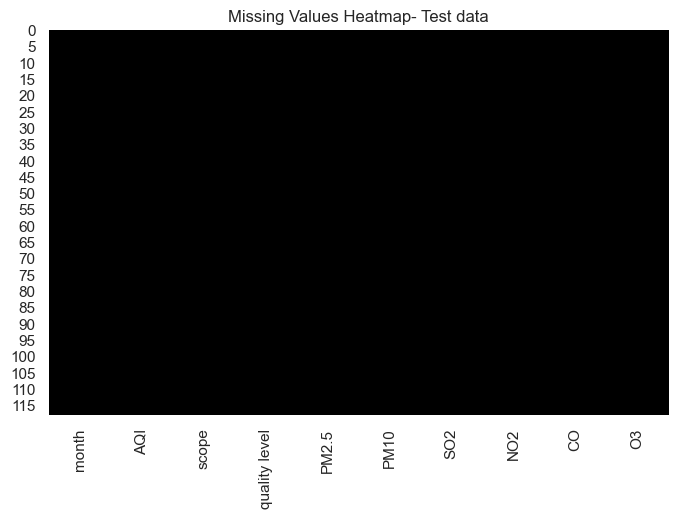

In [81]:
plt.figure(figsize=(8, 5))
sns.heatmap(test_data.isnull(), cmap='CMRmap', cbar=False)
plt.title('Missing Values Heatmap- Test data')
plt.show()

In [82]:
train_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [83]:
test_data.isna().sum()

month            0
AQI              0
scope            0
quality level    0
PM2.5            0
PM10             0
SO2              0
NO2              0
CO               0
O3               0
dtype: int64

In [84]:
 #taking a smaller sample of data for training
 train_df = train_data.sample(10000)   

In [85]:
#droppoing unwanted columns from the train and the test data
train_df = train_df.drop(columns=['NO','NOx','NH3', 'Benzene','Toluene','Xylene' ])
train_df.head(3)

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
7668,Chandigarh,2020-01-18,58.57,134.00,11.80,0.69,8.39,8.28,110.0,Moderate
10652,Delhi,2016-02-28,163.92,263.73,76.43,1.98,21.63,130.99,338.0,Very Poor
2673,Amaravati,2019-05-29,38.70,82.24,16.29,0.48,15.76,42.04,83.0,Satisfactory


In [86]:
test_df = test_data.drop(columns=['scope'])
test_df.sample(3)

,month,AQI,quality level,PM2.5,PM10,SO2,NO2,CO,O3
76,2020-04,75,good,31,67,4,22,0.403,119
29,2016-05,111,light pollution,54,90,8,38,0.665,160
25,2016-01,97,good,68,88,20,53,1.584,42


In [87]:
train_df['AQI_Bucket'].unique()

array(['Moderate', 'Very Poor', 'Satisfactory', 'Poor', 'Severe', nan,
       'Good'], dtype=object)

Text(0.5, 1.0, 'Train data -AQI')

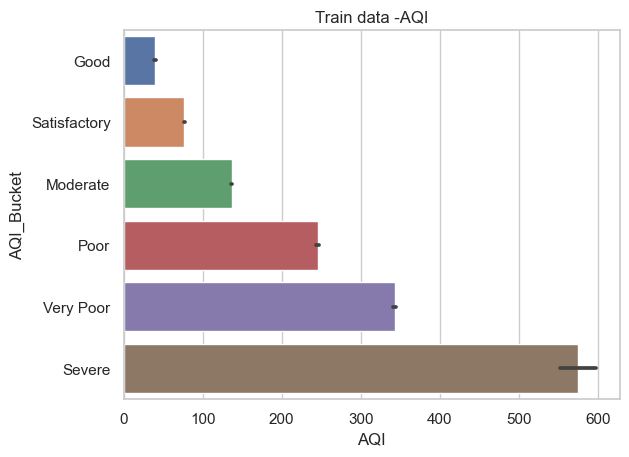

In [88]:
sns.barplot(data = train_df.sort_values(by='AQI'), x= 'AQI', y='AQI_Bucket')

plt.title("Train data -AQI")

Text(0.5, 1.0, 'Test data- AQI')

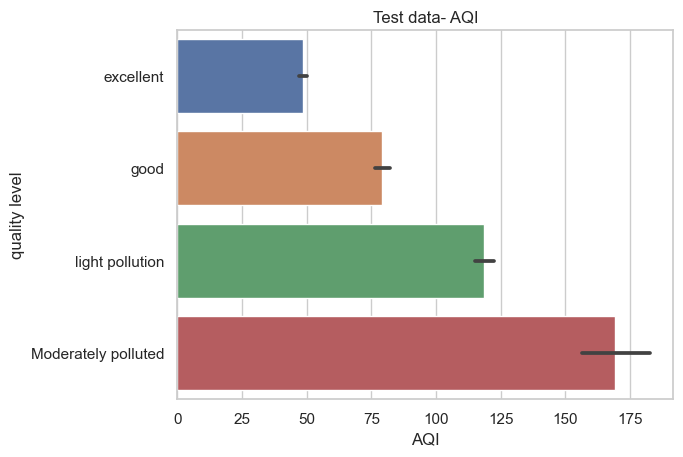

In [89]:
sns.barplot(data = test_df.sort_values(by='AQI'), x= 'AQI', y='quality level')
plt.title("Test data- AQI")

* Renaming the columns and arranging in same order to match each other

In [90]:
test_df.rename(columns={'quality level': 'AQI_Bucket'}, inplace=True)
test_df

,month,AQI,AQI_Bucket,PM2.5,PM10,SO2,NO2,CO,O3
0,2013-12,100,light pollution,73,97,37,56,1.730,38
1,2014-01,125,light pollution,94,123,51,65,1.948,37
2,2014-02,184,Moderately polluted,148,155,56,69,2.171,42
3,2014-03,130,light pollution,94,138,34,62,1.390,83
4,2014-04,127,light pollution,89,145,16,57,0.927,129
...,...,...,...,...,...,...,...,...,...
113,2023-05,91,good,31,72,3,20,0.452,138
114,2023-06,112,light pollution,20,45,3,19,0.390,170
115,2023-07,93,good,19,36,3,15,0.458,147
116,2023-08,71,good,22,38,3,15,0.494,122


* Detecting Outliesr

<AxesSubplot:title={'center':'Box Plot of AQI'}, xlabel='AQI'>

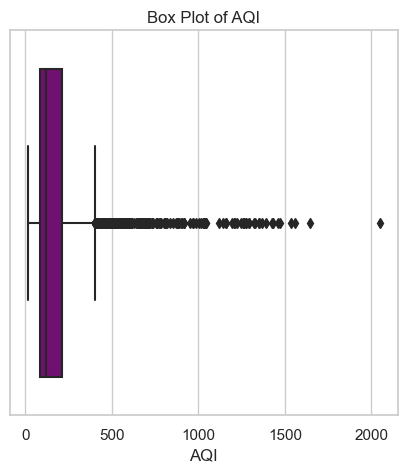

In [91]:
plt.figure(figsize=(5,5))
plt.title("Box Plot of AQI")
sns.boxplot(data=train_df, x='AQI',color='purple')

<AxesSubplot:title={'center':'ViolinPlot for AQI(Test)'}, xlabel='AQI'>

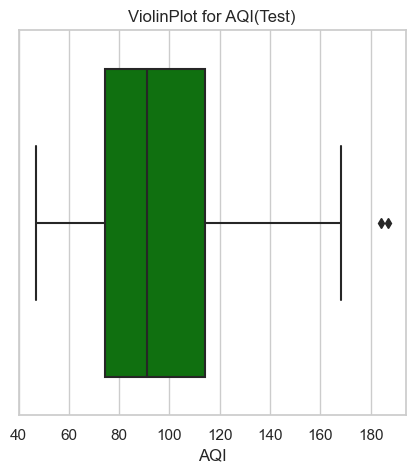

In [92]:
plt.figure(figsize=(5,5))
plt.title("ViolinPlot for AQI(Test)")
sns.boxplot(data=test_df, x='AQI',color='green')

In [93]:
train_df.query('AQI>500')

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
1680,Ahmedabad,2019-08-08,57.61,195.84,47.73,35.46,39.76,37.96,530.0,Severe
1508,Ahmedabad,2019-02-17,54.18,NaN,83.90,35.10,51.23,51.56,914.0,Severe
24434,Patna,2016-12-22,466.48,NaN,36.53,4.18,12.42,5.45,568.0,Severe
1538,Ahmedabad,2019-03-19,88.33,NaN,95.95,80.16,39.24,45.03,1017.0,Severe
20523,Lucknow,2016-11-08,499.06,NaN,75.44,1.66,12.00,45.86,604.0,Severe
...,...,...,...,...,...,...,...,...,...,...
1126,Ahmedabad,2018-01-31,115.79,NaN,166.11,42.54,151.92,32.24,1042.0,Severe
285,Ahmedabad,2015-10-13,137.87,NaN,32.98,20.20,21.89,17.41,536.0,Severe
1414,Ahmedabad,2018-11-15,83.28,NaN,97.90,33.47,48.93,36.84,688.0,Severe
1864,Ahmedabad,2020-02-08,95.25,160.18,54.77,14.56,55.99,68.81,652.0,Severe


In [94]:
#As per the domain knowledge removing the rows above 500
df_train = train_df[train_df['AQI'] < 501].reset_index(drop=True)

In [95]:
df_train

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
0,Chandigarh,2020-01-18,58.57,134.00,11.80,0.69,8.39,8.28,110.0,Moderate
1,Delhi,2016-02-28,163.92,263.73,76.43,1.98,21.63,130.99,338.0,Very Poor
2,Amaravati,2019-05-29,38.70,82.24,16.29,0.48,15.76,42.04,83.0,Satisfactory
3,Bengaluru,2019-04-05,46.54,108.25,37.85,1.07,5.22,53.59,130.0,Moderate
4,Jaipur,2018-01-03,106.38,246.82,84.12,0.00,12.06,28.61,232.0,Poor
...,...,...,...,...,...,...,...,...,...,...
8252,Lucknow,2020-04-12,62.39,NaN,17.93,0.98,6.93,24.84,151.0,Moderate
8253,Jorapokhar,2018-10-12,NaN,134.55,7.67,0.00,NaN,9.49,107.0,Moderate
8254,Brajrajnagar,2019-10-17,54.85,122.37,8.46,2.16,9.24,4.70,110.0,Moderate
8255,Mumbai,2018-09-22,31.22,59.71,21.98,1.35,17.08,49.13,80.0,Satisfactory


* KNN Imputation method for imputing data into null values

In [96]:
non_numeric_columns = df_train.select_dtypes(include=['object','datetime64[ns]']).columns

In [97]:
non_numeric_data = df_train[non_numeric_columns]

In [98]:
non_numeric_data.head()

,City,Date,AQI_Bucket
0,Chandigarh,2020-01-18,Moderate
1,Delhi,2016-02-28,Very Poor
2,Amaravati,2019-05-29,Satisfactory
3,Bengaluru,2019-04-05,Moderate
4,Jaipur,2018-01-03,Poor


In [99]:
knn_imputer = KNNImputer(n_neighbors=5)

In [100]:
numeric_columns = df_train.select_dtypes(include=['float']).columns

In [101]:
numeric_data = df_train[numeric_columns]

In [102]:
numeric_data.head(7)

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,58.57,134.00,11.80,0.69,8.39,8.28,110.0
1,163.92,263.73,76.43,1.98,21.63,130.99,338.0
2,38.70,82.24,16.29,0.48,15.76,42.04,83.0
3,46.54,108.25,37.85,1.07,5.22,53.59,130.0
4,106.38,246.82,84.12,0.00,12.06,28.61,232.0
5,114.10,NaN,15.32,1.02,4.96,22.08,302.0
6,31.78,NaN,15.26,3.63,1.55,17.27,110.0


In [103]:
imputed_numeric_data = knn_imputer.fit_transform(numeric_data)

In [104]:
imputed_df = pd.DataFrame(imputed_numeric_data, columns=numeric_columns)

In [105]:
imputed_df.head(5)

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,58.57,134.00,11.80,0.69,8.39,8.28,110.0
1,163.92,263.73,76.43,1.98,21.63,130.99,338.0
2,38.70,82.24,16.29,0.48,15.76,42.04,83.0
3,46.54,108.25,37.85,1.07,5.22,53.59,130.0
4,106.38,246.82,84.12,0.00,12.06,28.61,232.0


In [106]:
imputed_df.isna().sum()

PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [107]:
imputed_train_data = pd.concat([imputed_df, non_numeric_data], axis=1)

In [108]:
imputed_train_data.head(5)

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,City,Date,AQI_Bucket
0,58.57,134.00,11.80,0.69,8.39,8.28,110.0,Chandigarh,2020-01-18,Moderate
1,163.92,263.73,76.43,1.98,21.63,130.99,338.0,Delhi,2016-02-28,Very Poor
2,38.70,82.24,16.29,0.48,15.76,42.04,83.0,Amaravati,2019-05-29,Satisfactory
3,46.54,108.25,37.85,1.07,5.22,53.59,130.0,Bengaluru,2019-04-05,Moderate
4,106.38,246.82,84.12,0.00,12.06,28.61,232.0,Jaipur,2018-01-03,Poor


In [109]:
imputed_train_data.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,65.436010,131.356956,27.547323,1.649038,13.176130,34.428996,153.733559
std,57.743706,91.220137,22.509563,3.722202,14.610478,21.373845,102.216998
min,0.040000,0.030000,0.010000,0.000000,0.040000,0.040000,13.000000
25%,28.940000,65.300000,11.660000,0.570000,5.680000,19.000000,81.000000
50%,48.160000,106.580000,21.370000,0.920000,9.040000,30.800000,115.000000
75%,79.290000,171.550000,36.490000,1.420000,14.480000,45.200000,199.000000
max,868.660000,847.410000,277.310000,101.890000,176.880000,177.070000,499.000000


In [135]:
imputed_train_data.loc[(imputed_train_data['AQI'] >= 0) & (imputed_train_data['AQI'] <= 50.999), 'AQI_Bucket'] = 'Good'
imputed_train_data.loc[(imputed_train_data['AQI'] >= 51) & (imputed_train_data['AQI'] <= 100.999), 'AQI_Bucket'] = 'Satisfactory'
imputed_train_data.loc[(imputed_train_data['AQI'] >= 101) & (imputed_train_data['AQI'] <= 200.999), 'AQI_Bucket'] = 'Moderate'
imputed_train_data.loc[(imputed_train_data['AQI'] >= 201) & (imputed_train_data['AQI'] <= 300.999), 'AQI_Bucket'] = 'Poor'
imputed_train_data.loc[(imputed_train_data['AQI'] >= 301) & (imputed_train_data['AQI'] <= 400.999), 'AQI_Bucket'] = 'Very poor'
imputed_train_data.loc[(imputed_train_data['AQI'] >= 401) & (imputed_train_data['AQI'] <= 500.999), 'AQI_Bucket'] = 'Severe'

In [111]:
df_train.head(5)

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
0,Chandigarh,2020-01-18,58.57,134.00,11.80,0.69,8.39,8.28,110.0,Moderate
1,Delhi,2016-02-28,163.92,263.73,76.43,1.98,21.63,130.99,338.0,Very poor
2,Amaravati,2019-05-29,38.70,82.24,16.29,0.48,15.76,42.04,83.0,Satisfactory
3,Bengaluru,2019-04-05,46.54,108.25,37.85,1.07,5.22,53.59,130.0,Moderate
4,Jaipur,2018-01-03,106.38,246.82,84.12,0.00,12.06,28.61,232.0,Poor


In [112]:
test_df.loc[(test_df['AQI'] >= 0) & (test_df['AQI'] <= 50.999), 'AQI_Bucket'] = 'Good'
test_df.loc[(test_df['AQI'] >= 51) & (test_df['AQI'] <= 100.999), 'AQI_Bucket'] = 'Satisfactory'
test_df.loc[(test_df['AQI'] >= 101) & (test_df['AQI'] <= 200.999), 'AQI_Bucket'] = 'Moderate'
test_df.loc[(test_df['AQI'] >= 201) & (test_df['AQI'] <= 300.999), 'AQI_Bucket'] = 'Poor'
test_df.loc[(test_df['AQI'] >= 301) & (test_df['AQI'] <= 400.999), 'AQI_Bucket'] = 'Very poor'
test_df.loc[(test_df['AQI'] >= 401) & (test_df['AQI'] <= 500.999), 'AQI_Bucket'] = 'Severe'

In [113]:
test_df.head(5)

,month,AQI,AQI_Bucket,PM2.5,PM10,SO2,NO2,CO,O3
0,2013-12,100,Satisfactory,73,97,37,56,1.730,38
1,2014-01,125,Moderate,94,123,51,65,1.948,37
2,2014-02,184,Moderate,148,155,56,69,2.171,42
3,2014-03,130,Moderate,94,138,34,62,1.390,83
4,2014-04,127,Moderate,89,145,16,57,0.927,129


In [114]:
test_df['year'] = pd.to_datetime(test_data['month']).dt.year

In [115]:
average_aqi_per_year = test_df.groupby('year')['AQI'].mean().reset_index()

In [116]:
average_aqi_per_year

,year,AQI
0,2013,100.000000
1,2014,125.416667
2,2015,121.500000
3,2016,113.166667
4,2017,102.250000
5,2018,87.000000
6,2019,86.500000
7,2020,78.583333
8,2021,77.916667
9,2022,73.666667


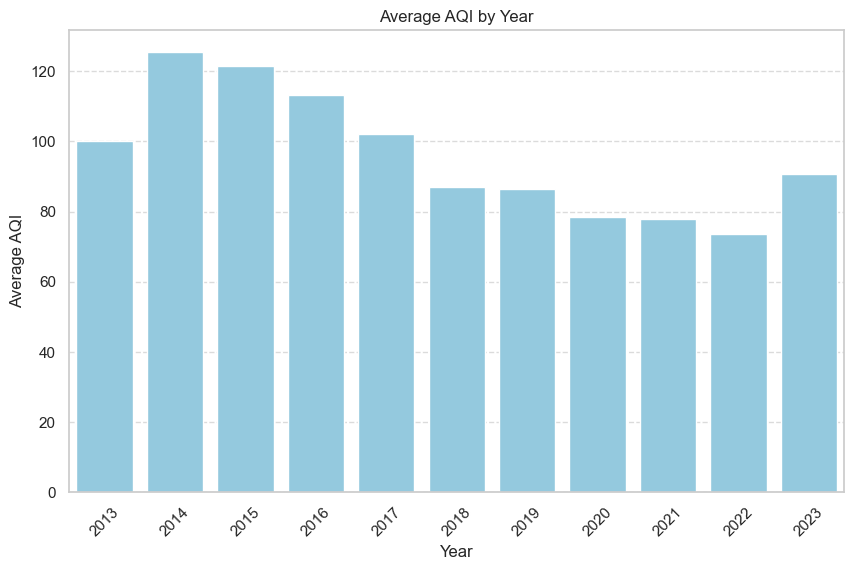

In [117]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=average_aqi_per_year, y='AQI', x='year', color='skyblue')

# Customize the plot further using Matplotlib
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Average AQI by Year')
plt.xticks(rotation=45)

# Add grid lines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [118]:
df_train['year'] = pd.to_datetime(df_train['Date']).dt.year

In [119]:
average_aqi_per_year_train = df_train.groupby('year')['AQI'].mean().reset_index()

In [120]:
average_aqi_per_year_train

,year,AQI
0,2015,196.555738
1,2016,192.329493
2,2017,171.251142
3,2018,158.122817
4,2019,145.815066
5,2020,107.975151


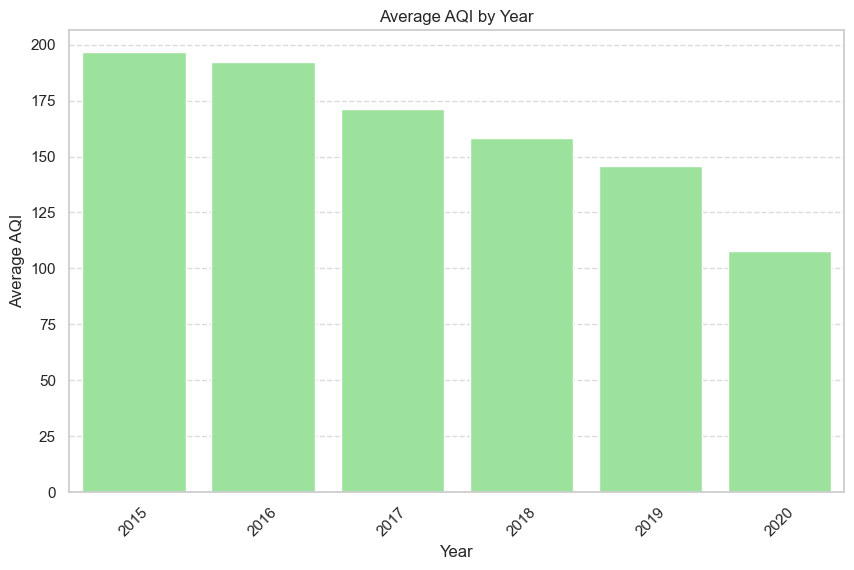

In [121]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=average_aqi_per_year_train, y='AQI', x='year', color='lightgreen')

# Customize the plot further using Matplotlib
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Average AQI by Year')
plt.xticks(rotation=45)

# Add grid lines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [122]:
avg_readings = df_train.groupby('City').mean().reset_index().round(2)
avg_readings

,City,PM2.5,PM10,NO2,CO,SO2,O3,AQI,year
0,Ahmedabad,57.45,104.35,47.99,13.62,47.04,37.93,296.03,2017.60
1,Aizawl,16.81,22.58,0.40,0.28,7.54,3.15,32.95,2020.00
2,Amaravati,37.08,72.85,20.88,0.61,13.85,37.83,92.68,2018.77
3,Amritsar,54.53,113.78,18.17,0.54,8.37,22.44,115.00,2018.46
4,Bengaluru,35.28,83.57,28.49,1.70,5.25,33.58,93.84,2017.35
5,Bhopal,51.83,120.93,32.49,0.92,12.92,58.56,135.74,2019.62
6,Brajrajnagar,65.41,124.72,16.92,1.79,9.64,14.65,152.13,2018.78
7,Chandigarh,43.11,88.37,12.13,0.64,10.05,20.16,98.99,2019.59
8,Chennai,50.82,61.23,16.41,1.09,7.67,32.55,116.33,2017.38
9,Coimbatore,28.46,37.92,24.06,1.00,8.67,27.89,74.64,2019.42


In [123]:
# avg readings for PM2.5 across all cities (pie chart)
trace1=go.Pie(labels=avg_readings['City'], values=avg_readings['PM2.5'].round(2),
             title='Average PM2.5 readings by City')
fig=go.Figure(trace1)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
pio.write_image(fig, 'avg_pm2.5_by_city.png')

In [124]:
# avg readings for PM10 across all cities (pie chart)
trace2=go.Pie(labels=avg_readings['City'], values=avg_readings['PM10'].round(2),
             title='Average PM10 readings by City')
fig=go.Figure(trace2)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
pio.write_image(fig, 'avg_pm10_by_city.png')

In [125]:
# avg readings for CO across all cities (pie chart)
trace3=go.Pie(labels=avg_readings['City'], values=avg_readings['CO'].round(2),
             title='Average CO readings by City')
fig=go.Figure(trace3)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [126]:
 # avg readings for SO2 across all cities (pie chart)
trace4=go.Pie(labels=avg_readings['City'], values=avg_readings['SO2'].round(2),
             title='Average SO2 readings by City')
fig=go.Figure(trace4)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [127]:
city_annual_avg=df_train.copy()
city_annual_avg['Date'] = pd.to_datetime(city_annual_avg['Date'])
city_annual_avg=city_annual_avg.groupby(['City', city_annual_avg.Date.dt.year]).mean().reset_index().rename(columns={'Date':'Year'})
city_annual_avg

,City,Year,PM2.5,PM10,NO2,CO,SO2,O3,AQI,year
0,Ahmedabad,2015,66.665316,NaN,16.700506,8.761266,25.289367,27.307722,240.316456,2015.0
1,Ahmedabad,2016,65.005385,NaN,12.188846,14.050385,17.841923,19.027200,276.884615,2016.0
2,Ahmedabad,2017,73.448889,NaN,66.873333,9.700000,96.003333,58.123333,215.222222,2017.0
3,Ahmedabad,2018,56.845000,NaN,63.805370,21.399630,62.398889,34.223182,378.555556,2018.0
4,Ahmedabad,2019,56.478571,108.690968,88.900238,18.908214,71.930357,50.157024,376.833333,2019.0
...,...,...,...,...,...,...,...,...,...,...
93,Visakhapatnam,2016,44.401731,83.990385,43.705000,1.085192,22.208846,43.164615,103.269231,2016.0
94,Visakhapatnam,2017,61.353158,115.389825,34.110182,1.148246,9.971579,54.414035,144.912281,2017.0
95,Visakhapatnam,2018,46.290094,108.575377,37.394762,0.691538,10.844151,34.280094,114.981308,2018.0
96,Visakhapatnam,2019,47.195094,111.457308,37.114206,0.851402,13.201495,33.284112,118.851852,2019.0


In [128]:
fig=px.bar(city_annual_avg, x='Year', y='CO', color='City', barmode='group',title='Carbon Monoxide (CO) average readings for each city between 2015 - 2020')
fig.show()

In [129]:
fig=px.bar(city_annual_avg, x='City', y='CO' , color='Year', title='Annual Average Carbon Monoxide (CO) Readings for each City, 2015-2020')
fig.show()

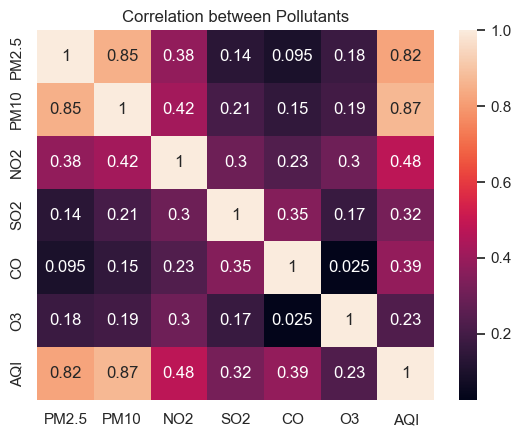

In [136]:
correlation = imputed_train_data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','O3','AQI']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation between Pollutants')
plt.show()

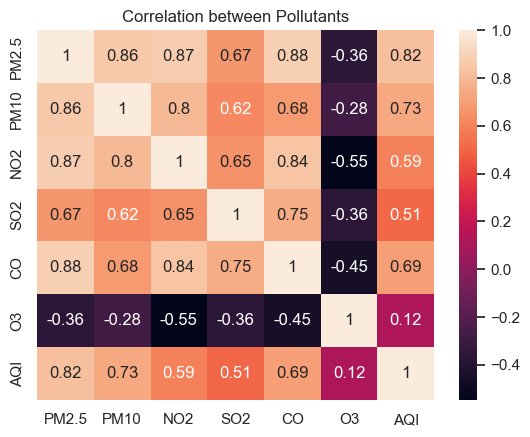

In [130]:
correlation = test_df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO','O3','AQI']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation between Pollutants')
plt.show()

In [137]:
imputed_train_data.isna().sum()

PM2.5         0
PM10          0
NO2           0
CO            0
SO2           0
O3            0
AQI           0
City          0
Date          0
AQI_Bucket    0
dtype: int64

### 2. Creating Pipeline for model building

MinMax Scalling and Randomforest regressor model

In [62]:
pipeline_rfr = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('regressor', RandomForestRegressor()) 
])

In [63]:
pipeline_svr = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('regressor', SVR(kernel='linear'))
])

In [64]:
pipeline_dt = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', DecisionTreeRegressor())
])

  ## 3. Testing Generalizeability

In [138]:
X=imputed_train_data.drop(['AQI', 'City','Date','AQI_Bucket'],axis=1)
y=imputed_train_data['AQI']
print(X.shape)
print(y.shape)


(8257, 6)
(8257,)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, y_train.shape

((6192, 6), (6192,))

In [140]:
pipeline_dt.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', DecisionTreeRegressor())])

In [141]:
Dt_trainscore=pipeline_dt.score(X_train, y_train)
Dt_trainscore

1.0

In [142]:
Dt_testscore=pipeline_dt.score(X_test, y_test)
Dt_testscore

0.8708474505901985

In [147]:
Dt_rmse=rmse(y_test, pipeline_dt.predict(X_test))
Dt_rmse

37.14338423913574

In [151]:
grid_param = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random'],
}


In [152]:
grid = GridSearchCV(
    DecisionTreeRegressor(), 
    grid_param,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [153]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [154]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [155]:
grid.best_score_

-21.576497042656257

In [156]:
gsdt_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

In [157]:
gsdt_results[['param_max_depth', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

,param_max_depth,mean_train_score,mean_test_score,rank_test_score
34,10,-14.933593,-21.576497,1
22,10,-14.442171,-21.626605,2
30,10,-14.748271,-21.663844,3
32,10,-14.748271,-21.668784,4
28,10,-14.665359,-21.705844,5
...,...,...,...,...
36,20,-0.826763,-24.862213,68
37,20,-3.128165,-25.017253,69
54,30,-0.001379,-25.075891,70
1,None,-0.000081,-26.059242,71


In [160]:
dt= DecisionTreeRegressor(max_depth= 10,min_samples_leaf =4, min_samples_split= 10,
 splitter='best')

In [161]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [162]:
dtbest_trainscore= dt.score(X_train,y_train)

In [163]:
dtbest_trainscore

0.9531233182097529

In [164]:
dtbest_testscore=dt.score(X_test,y_test)
dtbest_testscore

0.9132984272819366

In [165]:
dtbest_rmse=rmse(y_test, dt.predict(X_test))

In [166]:
dtbest_rmse

30.432908975298595

#### Random Forest 

In [168]:
pipeline_rfr.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', RandomForestRegressor())])

In [171]:
rfr_trainscore = pipeline_rfr.score(X_train, y_train)
rfr_trainscore

0.9895690865227468

In [172]:
rfr_testscore = pipeline_rfr.score(X_test, y_test)

In [173]:
rfr_testscore

0.9337471307562627

In [174]:
RFR_rmse=rmse(y_test, pipeline_rfr.predict(X_test))
RFR_rmse

26.603104777022544

In [178]:
grid_param = {
    'n_estimators': [30,50],
    'max_depth': [2,8, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [179]:
grid = GridSearchCV(
    RandomForestRegressor(), 
    grid_param,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [181]:
#grid.fit(X_train,y_train)

In [183]:
#grid.best_params_

### Support Vectoor Mechanism

In [184]:
pipeline_svr.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', SVR(kernel='linear'))])

In [185]:
svr_trainscore = pipeline_svr.score(X_train, y_train)
svr_trainscore

0.6338214131097977

In [186]:
svr_testscore = pipeline_svr.score(X_test, y_test)
svr_testscore

0.6441548265965724

In [187]:
svr_rmse=rmse(y_test, pipeline_rfr.predict(X_test))
svr_rmse

26.603104777022544

In [188]:
grid_param={
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],
    'coef0': [0.0, 1.0, 2.0],
    'shrinking': [True, False],
    'tol': [1e-4, 1e-3, 1e-2]
}

In [189]:
grid = GridSearchCV(
    SVR(), 
    grid_param,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [191]:
#grid.fit(X_train,y_train)

#### Ensemble

In [192]:
ensembled = [ pipeline_dt, pipeline_rfr, pipeline_svr]

In [193]:
for est in ensembled:
    est.fit(X_train, y_train)

In [196]:
ensemble = VotingRegressor(
    [
        ("dt", pipeline_dt), 
        ("rf", pipeline_rfr), 
        ("svr", pipeline_svr)
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('dt',
                             Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('regressor',
                                              DecisionTreeRegressor())])),
                            ('rf',
                             Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('regressor',
                                              RandomForestRegressor())])),
                            ('svr',
                             Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('regressor',
                                              SVR(kernel='linear'))]))])

In [197]:
all_regr = ensembled + [ ensemble ]

In [200]:
for est in all_regr:
    scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(scores.mean()*-1, scores.std())

39.9446285307233 1.375820504611771
28.88540805629708 0.674580020880937
63.841097340636544 3.972933463264425
35.55893203521276 1.0378724310407734


In [201]:
xt = X.head(20)
pred1 = pipeline_dt.predict(xt)
pred2 = pipeline_rfr.predict(xt)
pred3 = pipeline_svr.predict(xt)
pred4 = ensemble.predict(xt)

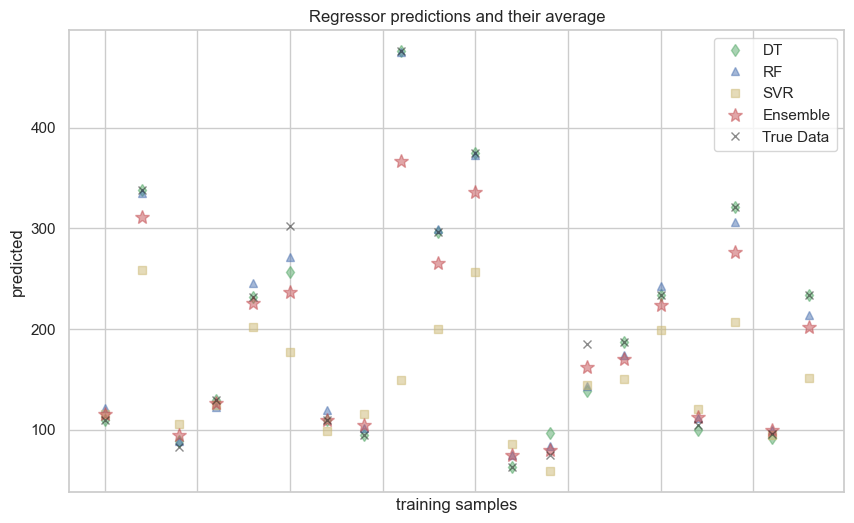

In [202]:
plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.5, label="DT")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred3, "ys", alpha=0.5, label="SVR")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20), "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [203]:
instance = X.head(1)
(pipeline_dt.predict(instance), pipeline_rfr.predict(instance), pipeline_svr.predict(instance), ensemble.predict(instance))

(array([110.]), array([121.17]), array([115.34569862]), array([115.34523287]))

## 4. Checking Transferability

In [205]:
test_df

,month,AQI,AQI_Bucket,PM2.5,PM10,SO2,NO2,CO,O3,year
0,2013-12,100,Satisfactory,73,97,37,56,1.730,38,2013
1,2014-01,125,Moderate,94,123,51,65,1.948,37,2014
2,2014-02,184,Moderate,148,155,56,69,2.171,42,2014
3,2014-03,130,Moderate,94,138,34,62,1.390,83,2014
4,2014-04,127,Moderate,89,145,16,57,0.927,129,2014
...,...,...,...,...,...,...,...,...,...,...
113,2023-05,91,Satisfactory,31,72,3,20,0.452,138,2023
114,2023-06,112,Moderate,20,45,3,19,0.390,170,2023
115,2023-07,93,Satisfactory,19,36,3,15,0.458,147,2023
116,2023-08,71,Satisfactory,22,38,3,15,0.494,122,2023


In [206]:
xtest=test_df.drop(['AQI', 'month','year','AQI_Bucket'],axis=1)
ytest=test_df['AQI']
print(xtest.shape)
print(ytest.shape)


(118, 6)
(118,)


In [208]:
reorder = ['PM2.5','PM10','NO2','CO','SO2','O3']
xtest = xtest[reorder]

In [209]:
rfr_testdatascore = pipeline_rfr.score(xtest, ytest)
rfr_testdatascore

-0.8317438216023827

In [210]:
dt_testdatascore = pipeline_dt.score(xtest, ytest)
dt_testdatascore

-2.7412255791413385

In [211]:
svr_testdatascore = pipeline_svr.score(xtest, ytest)
svr_testdatascore

-0.7803785714898328

### Model Evaluation

In [212]:
#Ranking Models based on their scores
results = {'Regression_Model': ['DT', 'RFM', 'SVR'],
        'RMSE': [dtbest_rmse, RFR_rmse, svr_rmse],
        'Train_Accuracy_score':[dtbest_trainscore,rfr_trainscore,svr_trainscore],
        'Test_Accuracy_score':[dtbest_testscore,rfr_testscore,svr_testscore]}

In [213]:
model_score= pd.DataFrame(results)
model_score

,Regression_Model,RMSE,Train_Accuracy_score,Test_Accuracy_score
0,DT,30.432909,0.953123,0.913298
1,RFM,26.603105,0.989569,0.933747
2,SVR,26.603105,0.633821,0.644155


<AxesSubplot:xlabel='Regression_Model', ylabel='RMSE'>

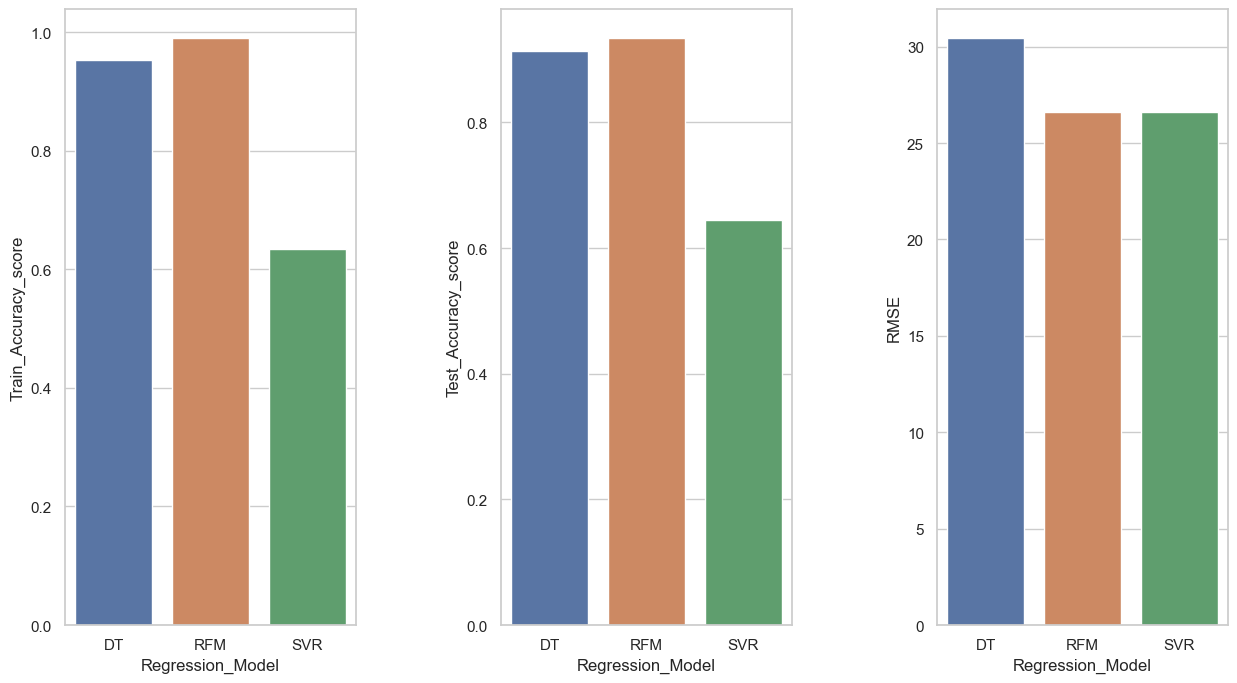

In [214]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,3,1)
sns.barplot(data=model_score,x='Regression_Model',y='Train_Accuracy_score')
plt.subplot(1,3,2)
sns.barplot(data=model_score,x='Regression_Model',y='Test_Accuracy_score')
plt.subplot(1,3,3)
sns.barplot(data=model_score,x='Regression_Model',y='RMSE')

In [216]:
#Random Forest model cross validation
RFR_scores = cross_val_score(pipeline_rfr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
RFR_scores.mean()*-1, RFR_scores.std()

(28.525563401453315, 2.122207620244063)

In [218]:
#Decision Tree model cross validation
DT_scores = cross_val_score(pipeline_dt, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
DT_scores.mean()*-1, DT_scores.std()

(38.56164486755839, 3.0963215773900266)

In [219]:
#SVR model cross validation
svr_scores = cross_val_score(pipeline_svr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
svr_scores.mean()*-1, svr_scores.std()

(62.67089748265302, 3.34080538907942)

#### True vs predict

Decison Tree

In [222]:
r2_dt= r2_score(y_test,dt.predict(X_test))
r2_dt

0.9132984272819366

In [225]:
mae_dt = mean_absolute_error(y_test, dt.predict(X_test))
mae_dt

20.051528080879493

In [226]:
mse_dt = mean_squared_error( y_test,dt.predict(X_test))
mse_dt

926.1619486988097

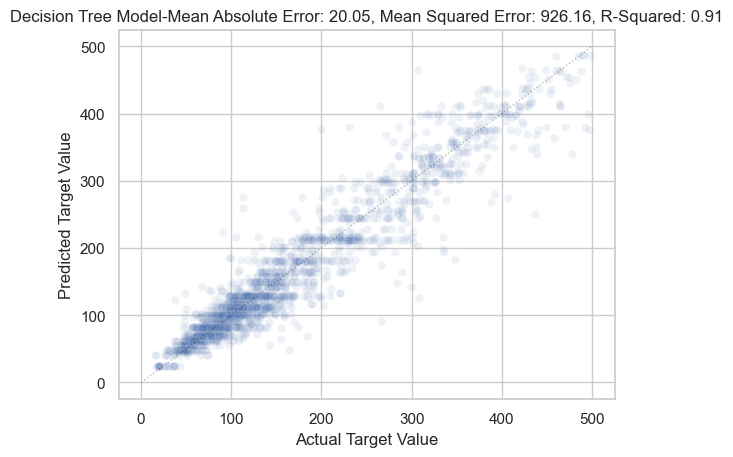

In [232]:
ax = sns.scatterplot(x=y_test, y=dt.predict(X_test), alpha=0.09)
ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Target Value')
plt.title("Decision Tree Model-Mean Absolute Error: {:.2f}, Mean Squared Error: {:.2f}, R-Squared: {:.2f}".format(mae_dt, mse_dt, r2_dt))
#ax.set_xlim(-2,3)
#ax.set_ylim(-2,3)
ax.plot([0, 500], [0, 500], ':k', alpha=0.3, lw=1);
plt.savefig("Predicted Vs Actual for Decision Tree Regressor.png")

Random Forest rgressor

In [233]:
r2_rfr= r2_score(y_test,pipeline_rfr.predict(X_test))
r2_rfr

0.9342731694085226

In [234]:
mae_rfr = mean_absolute_error(y_test, pipeline_rfr.predict(X_test))
mae_rfr

17.504125907990318

In [235]:
mse_rfr = mean_squared_error(y_test, pipeline_rfr.predict(X_test))
mse_rfr

702.1059433414043

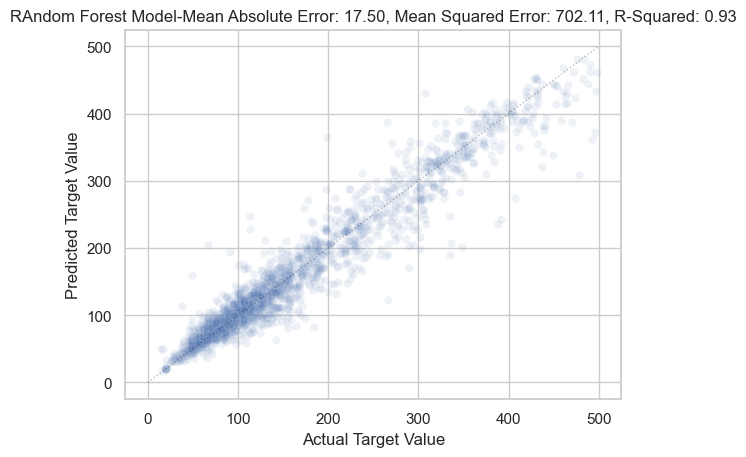

In [236]:
ax = sns.scatterplot(x=y_test, y=pipeline_rfr.predict(X_test), alpha=0.09)
ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Target Value')
plt.title("RAndom Forest Model-Mean Absolute Error: {:.2f}, Mean Squared Error: {:.2f}, R-Squared: {:.2f}".format(mae_rfr, mse_rfr, r2_rfr))
#ax.set_xlim(-2,3)
#ax.set_ylim(-2,3)
ax.plot([0, 500], [0, 500], ':k', alpha=0.3, lw=1);
plt.savefig("Predicted Vs Actual for Random Forest.png")

In [237]:
r2_svr = r2_score(y_test, pipeline_svr.predict(X_test))
r2_svr

0.6441548265965724

In [238]:
mae_svr = mean_absolute_error(y_test, pipeline_svr.predict(X_test))
mae_svr

40.5743485013059

In [239]:
mse_svr = mean_squared_error(y_test, pipeline_svr.predict(X_test))
mse_svr

3801.2027798628574

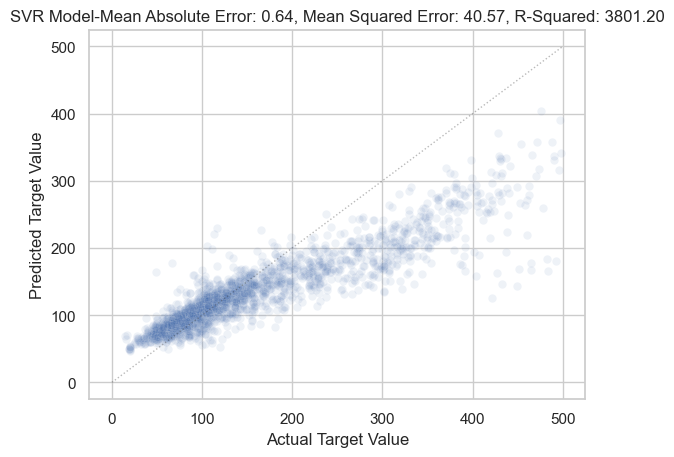

In [243]:
ax = sns.scatterplot(x=y_test, y=pipeline_svr.predict(X_test), alpha=0.09)
ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Target Value')
plt.title("SVR Model-Mean Absolute Error: {:.2f}, Mean Squared Error: {:.2f}, R-Squared: {:.2f}".format(r2_svr, mae_svr, mse_svr))
#ax.set_xlim(-2,3)
#ax.set_ylim(-2,3)
ax.plot([0, 500], [0, 500], ':k', alpha=0.3, lw=1);
plt.savefig("Predicted Vs Actual forSVR.png")

In [244]:
#importing Shap libraries
!pip install -q shap
import shap
shap.initjs()

In [245]:
explainer = shap.Explainer(dt.predict, X_train)


In [246]:
shap_values = explainer(X_train)

Exact explainer: 6193it [00:28, 158.76it/s]                                                                            


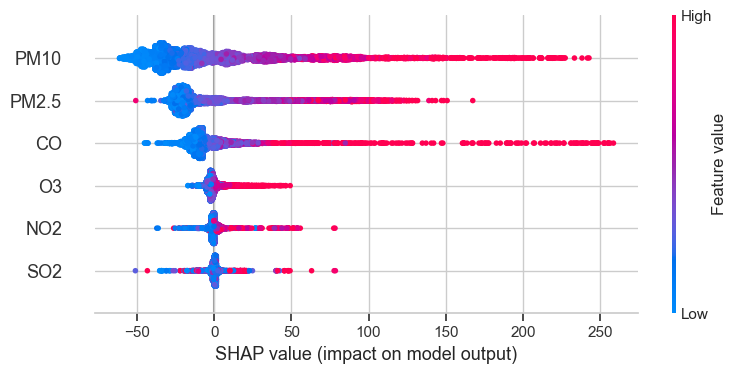

In [247]:
shap.summary_plot(
    shap_values, 
    X_train
)

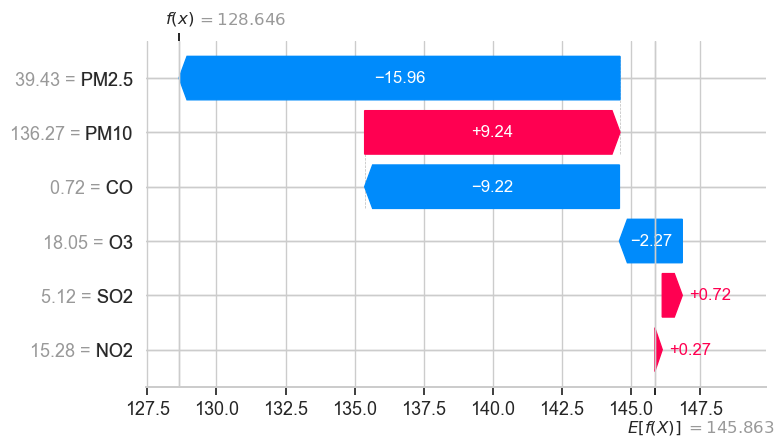

In [248]:
shap.plots.waterfall(shap_values[0])